In [7]:
import numpy as np
import matplotlib.pyplot as plt

import sympy

## Ring points generation


## Simple model

We use a minimal model of the tissue with an energy as:

$$E = \sum_\alpha \frac{K_\alpha}{2}(A_\alpha - A_\alpha^0)^2 + \sum_{i,j} \Lambda_{ij}\ell_{ij}$$

Where the first sum is over the faces and the second is over the edges of the mesh, $A_\alpha$ is the area of cell $\alpha$ and $\ell_{ij}$ the length of the edge between vertices $i$ and $j$.




### Regular polygon model

We can work with a fully symetrical model to set the average values of the parameters $K_\alpha, A_\alpha^0$ and $\Lambda_{ij}$. We note those by droping the indices, except to differentiate between apical, basal and lateral segments for the edges, $K, A^0, \Lambda_a,\Lambda_b, \Lambda_l$

Let's assume that the mesh is perfectly circular, with $R_i$ and $R_o$ the inner and outer diameters, respectively, and $N_f$ the number of faces. 

We have:

$$ E_s = \frac{N_f K}{2}(A - A^0)^2 + N_f\Lambda_b\ell_b + N_f\Lambda_a\ell_a + 2N_f\Lambda_l\ell_l $$

We can normalise by dividing by $N_f$ and setting $K=1$ by definition:

$$ E_s/N_f = \epsilon_s = \frac{1}{2}(A - A^0)^2 + \Lambda_b\ell_b + \Lambda_a\ell_a + 2\Lambda_l\ell_l $$

The lengths of the lateral edges is $\ell_l = R_o - R_i$

The length of the basal and apical edges are the chord lengths:
$$
\ell_a = 2R_i\sin(\pi/N_f), \ell_b = 2R_o\sin(\pi/N_f)
$$

We can compute the area of the cell as it is a simple trapezoid whose height is $h = (R_o - R_i)\cos(\pi/N_f)/2$:
$$
A = \frac{h(\ell_a + \ell_b)}{2} = \frac{(R_o - R_i)}{2}\cos(\pi/N_f)(2R_o + 2R_i)\sin(\pi/N_f) = \frac{(R_o^2 - R_i^2)}{2}\sin(2\pi/N_f)
$$

#### Homogenous line tension case

If the line tension is the same for all the segments, we have:

$$
\epsilon_s = \frac{1}{2}\left(\frac{(R_o^2 - R_i^2)}{2}\sin(2\pi/N_f) - A^0\right)^2 + 2\Lambda\left((R_o - R_i) + (R_o + R_i)\sin(\pi/Nf)\right)
$$

The problem is then to look for the minimum of this experession as a function of $A^0$ and $\Lambda$.



$$ \epsilon_s = \frac{(1 - \alpha)^2}{2}A^2 + \Lambda_b R_b \sin\frac{\pi}{N_f} + \Lambda_a R_a \sin\frac{\pi}{N_f} + 2\Lambda_l (R_b - R_a)
$$


$$
\begin{eqnarray}
\frac{\partial \epsilon_s}{\partial R_a} &=& (1-\alpha)^2 A \frac{\partial A}{\partial R_a} + \Lambda_a  \sin\frac{\pi}{N_f} - 2 \Lambda_l \\
\frac{\partial \epsilon_s}{\partial R_b} &=& (1-\alpha)^2 A \frac{\partial A}{\partial R_b} + \Lambda_b  \sin\frac{\pi}{N_f} + 2 \Lambda_l \\
\end{eqnarray}
$$


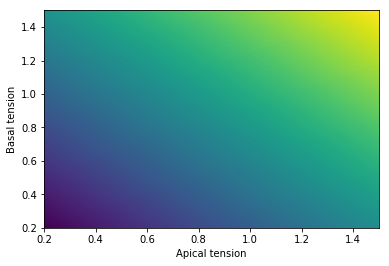

In [8]:
from math import sin, cos
R_a, R_b = 110, 150
Nf = 12



def symmetric_energy(lbda_a, lbda_b, lbda_l=1, Nf=12, R_a=110, R_b=150, alpha=1.1, KL=10):
    
    area = (R_b**2 - R_a**2) * sin(2*np.pi/Nf) / 2
    area_elasticity = 0.5 * (area * (1 - alpha))**2
    lumen_elasticity = 0.5*KL * (R_a**2 * sin(2*np.pi/Nf)* (1 - alpha) / 2)**2
    line_tension =  (lbda_a * R_a + lbda_b * R_b) * sin(np.pi/Nf) + 2*lbda_l * (R_b - R_a)
    
    return area_elasticity + line_tension + lumen_elasticity

lbda_a, lbda_b = np.meshgrid(np.linspace(0.2, 1.5, 128),
                             np.linspace(0.5, 1.5, 128))


energies = symmetric_energy(lbda_a, lbda_b)

fig, ax = plt.subplots()
ax.pcolorfast([lbda_a.min(), lbda_a.max()],
              [lbda_a.min(), lbda_a.max()], energies)
_ = ax.set(xlabel='Apical tension',
           ylabel='Basal tension')

In [9]:
energies.argmin()


0